In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import keras 
import tensorflow as tf 


In [2]:
dataset=pd.read_csv(r"C:\Users\Rohith\Downloads\data.csv\data.csv")
dataset.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
dataset.shape

(76014, 15)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
cols_not_needed=['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker']
ipl_data=dataset.drop(cols_not_needed,axis=1)
ipl_data.head()

,venue,batting_team,bowling_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [6]:
x = ipl_data.drop(['total'], axis =1)
y = ipl_data['total']

In [7]:


# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
x['venue'] = venue_encoder.fit_transform(x['venue'])
x['batting_team'] = batting_team_encoder.fit_transform(x['batting_team'])
x['bowling_team'] = bowling_team_encoder.fit_transform(x['bowling_team'])
x['batsman'] = striker_encoder.fit_transform(x['batsman'])
x['bowler'] = bowler_encoder.fit_transform(x['bowler'])

In [8]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:


scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
model = keras.Sequential([
    keras.layers.Input( shape=(x_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3072      
                                                                 
 dense_1 (Dense)             (None, 216)               110808    
                                                                 
 dense_2 (Dense)             (None, 1)                 217       
                                                                 
Total params: 114,097
Trainable params: 114,097
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(x_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 6s 6ms/step - loss: 32.0826 - val_loss: 22.0662
Epoch 2/50
832/832 [==============================] - 4s 5ms/step - loss: 22.3100 - val_loss: 22.3696
Epoch 3/50
832/832 [==============================] - 5s 5ms/step - loss: 22.2957 - val_loss: 21.9308
Epoch 4/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2529 - val_loss: 22.0001
Epoch 5/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1858 - val_loss: 21.8173
Epoch 6/50
832/832 [==============================] - 5s 5ms/step - loss: 22.1437 - val_loss: 21.8615
Epoch 7/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1474 - val_loss: 21.8085
Epoch 8/50
832/832 [==============================] - 4s 5ms/step - loss: 22.0899 - val_loss: 21.7812
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.0544 - val_loss: 21.7701
Epoch 10/50
832/832 [==============================] - 5s 5ms/step - loss: 22.0635

<Axes: >

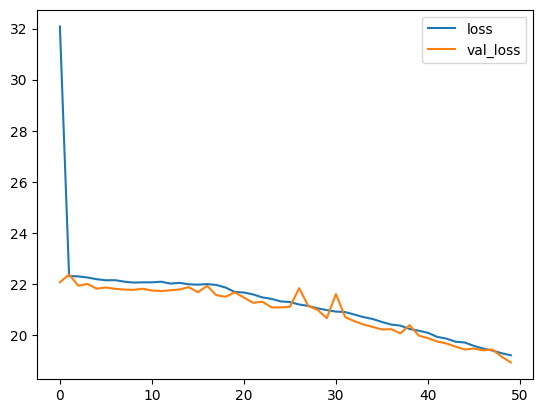

In [12]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [13]:
predictions = model.predict(x_test_scaled)

mean_absolute_error(y_test,predictions)

713/713 [==============================] - 1s 2ms/step


19.415578574607363

In [15]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=ipl_data['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =ipl_data['batting_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=ipl_data['bowling_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=ipl_data['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=ipl_data['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [16]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()